In [2]:

import csv
import os
import sys
import re
import json
import argparse

import numpy as np


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
data_file = os.path.join(os.getcwd(), 'data/towary_spozywcze_lata.csv')


data = pd.read_csv(data_file, delimiter=';')



data.head()

# convert wartosc to floats
data['wartosc'] = data['wartosc'].str.replace(',', '.').astype(float)


    


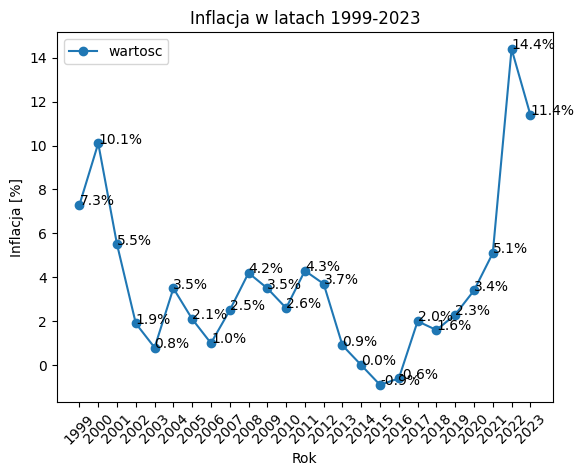

In [4]:
inflation_data_file = os.path.join(os.getcwd(), 'data/Inflacja_lata.csv')
inflation_data = pd.read_csv(inflation_data_file, delimiter=',')


#make the X axis show every year

inflation_data['wartosc'] = inflation_data['wartosc'] - 100

# make more rok labels visible
inflation_data.plot(x='rok', y='wartosc', kind='line', marker='o')
plt.rcParams['figure.figsize'] = [10, 6]
# add % values on the points rounded to 2 decimal places
for i in range(len(inflation_data)):
    plt.text(inflation_data['rok'][i], inflation_data['wartosc'][i], str(round(inflation_data['wartosc'][i], 2)) + '%')
plt.title('Inflacja w latach 1999-2023')
# add dots
plt.xticks(inflation_data['rok'], rotation=45)
plt.xlabel('Rok')
plt.ylabel('Inflacja [%]')


plt.show()

In [5]:
## list all unique nazwa_pozycja_2
data['nazwa_pozycja_2'].unique()

array(['chleb pszenno-żytni za 0.5 kg', 'mąka pszenna za 1 kg',
       'kasza jęczmienna za 0.5 kg',
       'mięso wołowe z kością (rostbef) za 1 kg',
       'mięso wołowe bez kości (z udźca) za 1 kg',
       'mięso wieprzowe z kością (schab środkowy) za 1 kg',
       'kurczęta patroszone za 1 kg', 'szynka wieprzowa gotowana za 1 kg',
       'polędwica drobiowa za 1 kg', 'kiełbasa wędzona za 1 kg',
       'filety z morszczuka mrożone za 1 kg',
       'mleko krowie spożywcze o zawartości tłuszczu 3-3,5%, sterylizowane za 1 l',
       'ser twarogowy półtłusty za 1 kg', 'jaja kurze świeże za 1 szt',
       'masło świeże o zawartości tłuszczu ok. 82,5% za 200 g',
       'olej rzepakowy produkcji krajowej za 1 l', 'pomarańcze za 1 kg',
       'jabłka za 1 kg', 'buraki za 1 kg', 'marchew za 1 kg',
       'cebula za 1 kg', 'ziemniaki za 1 kg',
       'cukier biały kryształ za 1 kg', 'sok jabłkowy za 1 l'],
      dtype=object)

In [6]:
data['opis_okres']

0      2010 M12
1      2010 M12
2      2010 M12
3      2010 M12
4      2010 M12
         ...   
331    2023 M12
332    2023 M12
333    2023 M12
334    2023 M12
335    2023 M12
Name: opis_okres, Length: 336, dtype: object

In [7]:
data['nazwa_pozycja_2'].unique()

array(['chleb pszenno-żytni za 0.5 kg', 'mąka pszenna za 1 kg',
       'kasza jęczmienna za 0.5 kg',
       'mięso wołowe z kością (rostbef) za 1 kg',
       'mięso wołowe bez kości (z udźca) za 1 kg',
       'mięso wieprzowe z kością (schab środkowy) za 1 kg',
       'kurczęta patroszone za 1 kg', 'szynka wieprzowa gotowana za 1 kg',
       'polędwica drobiowa za 1 kg', 'kiełbasa wędzona za 1 kg',
       'filety z morszczuka mrożone za 1 kg',
       'mleko krowie spożywcze o zawartości tłuszczu 3-3,5%, sterylizowane za 1 l',
       'ser twarogowy półtłusty za 1 kg', 'jaja kurze świeże za 1 szt',
       'masło świeże o zawartości tłuszczu ok. 82,5% za 200 g',
       'olej rzepakowy produkcji krajowej za 1 l', 'pomarańcze za 1 kg',
       'jabłka za 1 kg', 'buraki za 1 kg', 'marchew za 1 kg',
       'cebula za 1 kg', 'ziemniaki za 1 kg',
       'cukier biały kryształ za 1 kg', 'sok jabłkowy za 1 l'],
      dtype=object)

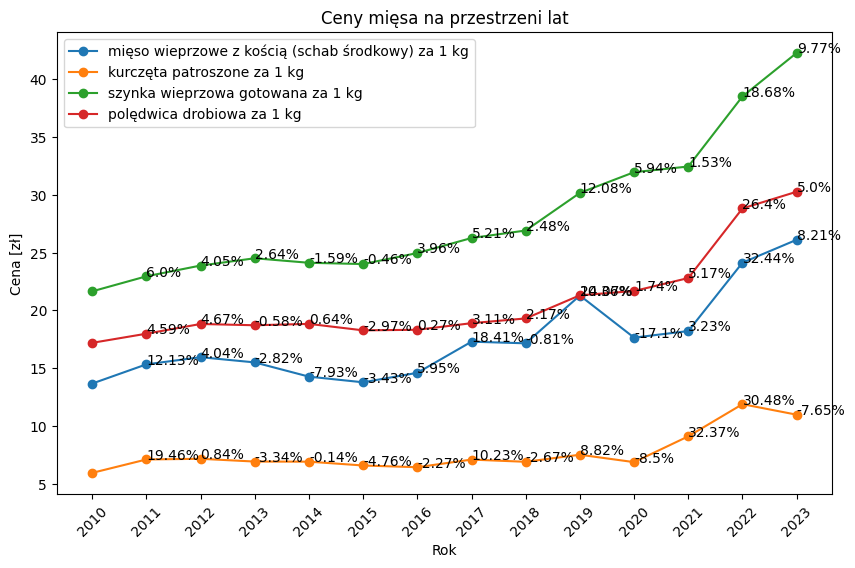

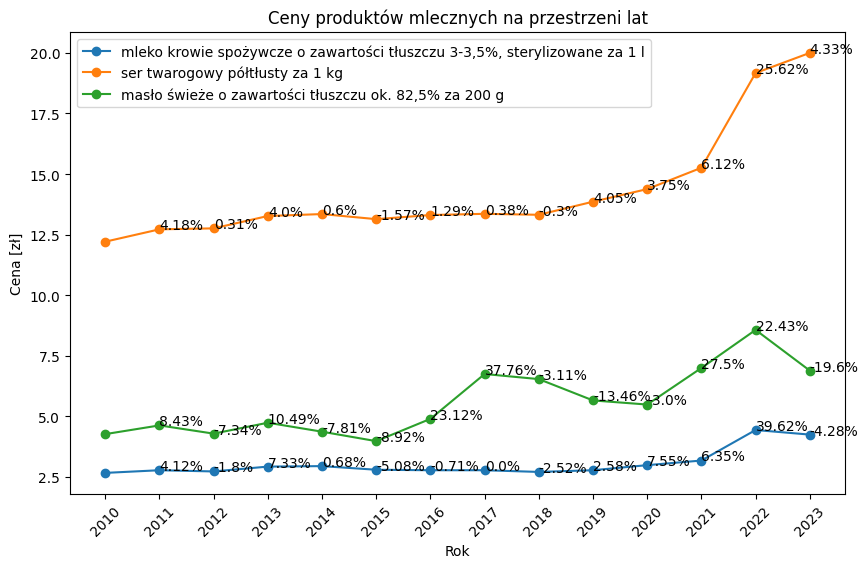

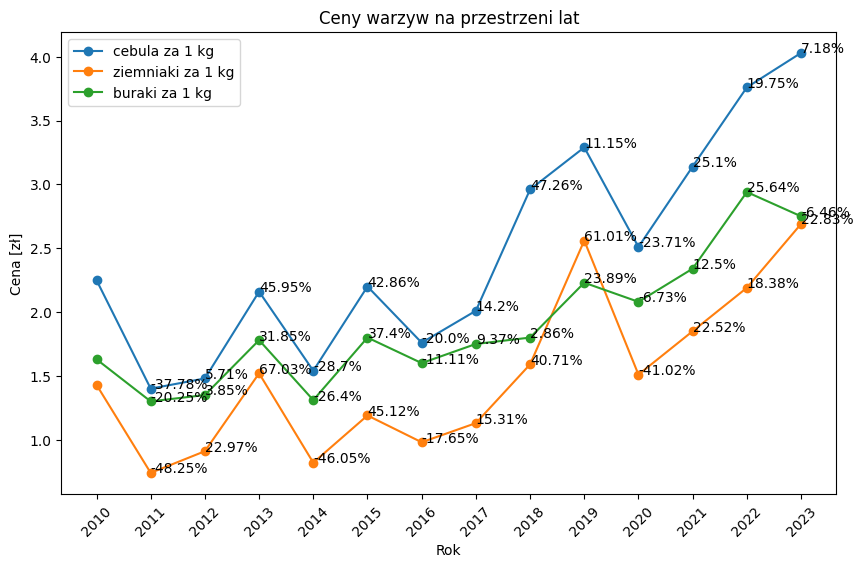

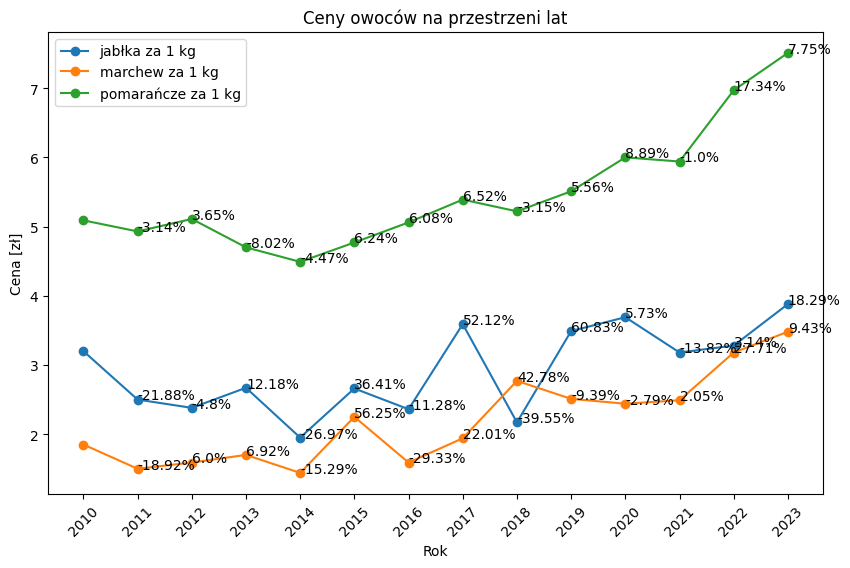

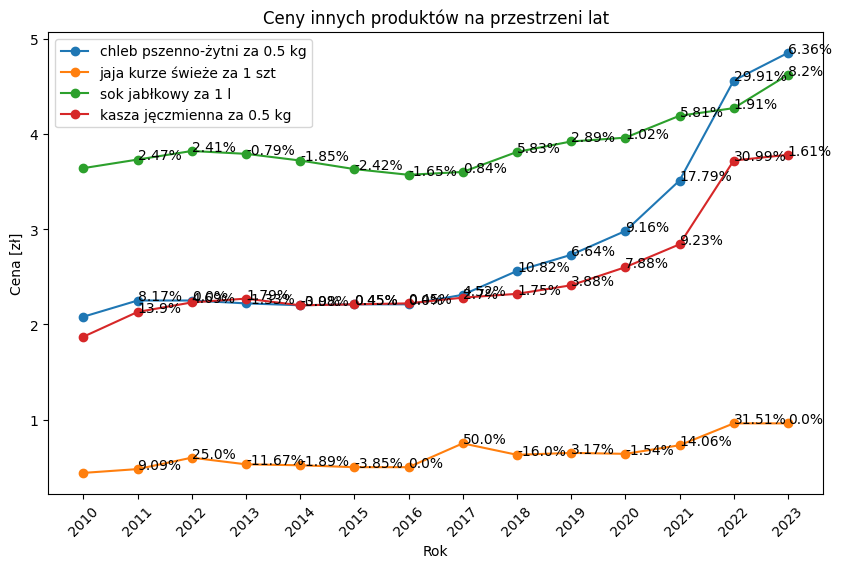

In [8]:
meat_data = ['mięso wieprzowe z kością (schab środkowy) za 1 kg', 'kurczęta patroszone za 1 kg', 'szynka wieprzowa gotowana za 1 kg', 'polędwica drobiowa za 1 kg']
dairy_data = ['mleko krowie spożywcze o zawartości tłuszczu 3-3,5%, sterylizowane za 1 l', 'ser twarogowy półtłusty za 1 kg', 'masło świeże o zawartości tłuszczu ok. 82,5% za 200 g']
vegetable_data = ['cebula za 1 kg', 'ziemniaki za 1 kg',  'buraki za 1 kg']
fruit_data = ['jabłka za 1 kg', 'marchew za 1 kg', 'pomarańcze za 1 kg']
misc_data = ['chleb pszenno-żytni za 0.5 kg', 'jaja kurze świeże za 1 szt', 'sok jabłkowy za 1 l', 'kasza jęczmienna za 0.5 kg']

# make all opis_okres in data only leave 4 fist characters
data['opis_okres'] = data['opis_okres'].str[:4]


# Increase the size of the plots
plt.rcParams['figure.figsize'] = [10, 6]



#
for item in meat_data:
    data_item = data[data['nazwa_pozycja_2'] == item]
    #draw the procent increase of price in the point 
    plt.plot(data_item['opis_okres'], data_item['wartosc'], label=item, marker='o')
    for i in range(1, len(data_item)):
        plt.text(data_item.iloc[i]['opis_okres'], data_item.iloc[i]['wartosc'], str(round((data_item.iloc[i]['wartosc'] - data_item.iloc[i-1]['wartosc'])/data_item.iloc[i-1]['wartosc']*100, 2)) + '%')

    
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Cena [zł]')
plt.title('Ceny mięsa na przestrzeni lat')
plt.show()

for item in dairy_data:
    data_item = data[data['nazwa_pozycja_2'] == item]
    plt.plot(data_item['opis_okres'], data_item['wartosc'], label=item, marker='o')
    for i in range(1, len(data_item)):
        plt.text(data_item.iloc[i]['opis_okres'], data_item.iloc[i]['wartosc'], str(round((data_item.iloc[i]['wartosc'] - data_item.iloc[i-1]['wartosc'])/data_item.iloc[i-1]['wartosc']*100, 2)) + '%')

plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Cena [zł]')
plt.title('Ceny produktów mlecznych na przestrzeni lat')
plt.show()

for item in vegetable_data:
    data_item = data[data['nazwa_pozycja_2'] == item]
    plt.plot(data_item['opis_okres'], data_item['wartosc'], label=item, marker='o')
    for i in range(1, len(data_item)):
        plt.text(data_item.iloc[i]['opis_okres'], data_item.iloc[i]['wartosc'], str(round((data_item.iloc[i]['wartosc'] - data_item.iloc[i-1]['wartosc'])/data_item.iloc[i-1]['wartosc']*100, 2)) + '%')

plt.xticks(rotation=45)
plt.legend()
plt.title('Ceny warzyw na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Cena [zł]')
plt.show()

for item in fruit_data:
    data_item = data[data['nazwa_pozycja_2'] == item]
    plt.plot(data_item['opis_okres'], data_item['wartosc'], label=item, marker='o')
    for i in range(1, len(data_item)):
        plt.text(data_item.iloc[i]['opis_okres'], data_item.iloc[i]['wartosc'], str(round((data_item.iloc[i]['wartosc'] - data_item.iloc[i-1]['wartosc'])/data_item.iloc[i-1]['wartosc']*100, 2)) + '%')

plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Cena [zł]')
plt.title('Ceny owoców na przestrzeni lat')
plt.show()

for item in misc_data:
    data_item = data[data['nazwa_pozycja_2'] == item]
    plt.plot(data_item['opis_okres'], data_item['wartosc'], label=item, marker='o')
    for i in range(1, len(data_item)):
        plt.text(data_item.iloc[i]['opis_okres'], data_item.iloc[i]['wartosc'], str(round((data_item.iloc[i]['wartosc'] - data_item.iloc[i-1]['wartosc'])/data_item.iloc[i-1]['wartosc']*100, 2)) + '%')

plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Cena [zł]')
plt.title('Ceny innych produktów na przestrzeni lat')
plt.show()






In [12]:

students_mounthly_products = {'mięso wieprzowe z kością (schab środkowy) za 1 kg': 2, 'kurczęta patroszone za 1 kg': 6, 'szynka wieprzowa gotowana za 1 kg': 2, 'polędwica drobiowa za 1 kg': 2, 'mleko krowie spożywcze o zawartości tłuszczu 3-3,5% za 1 l': 5, 'ser twarogowy półtłusty za 1 kg': 2, 'masło świeże o zawartości tłuszczu ok. 82,5% za 200 g': 2, 'cebula za 1 kg': 1, 'ziemniaki za 1 kg': 2, 'buraki za 1 kg': 2, 'jabłka za 1 kg': 1, 'marchew za 1 kg': 2, 'pomarańcze za 1 kg': 1, 'chleb pszenno-żytni za 0.5 kg': 6, 'jaja kurze świeże za 1 szt': 12, 'sok jabłkowy za 1 l': 3, 'kasza jęczmienna za 0.5 kg': 3}

# print out students_mounthly_products in latex format for the report
print('Produkty spożywcze na miesiąc dla studenta:')
print('\\begin{table}[H]')
print('\\centering')
print('\\begin{tabular}{|c|c|}')
print('\\hline')
print('Produkt & Ilość \\\\')
print('\\hline')
for key, value in students_mounthly_products.items():
    print(key + ' & ' + str(value) + ' \\\\')
print('\\hline')
print('\\end{tabular}')
print('\\end{table}')


Produkty spożywcze na miesiąc dla studenta:
\begin{table}[H]
\centering
\begin{tabular}{|c|c|}
\hline
Produkt & Ilość \\
\hline
mięso wieprzowe z kością (schab środkowy) za 1 kg & 2 \\
kurczęta patroszone za 1 kg & 6 \\
szynka wieprzowa gotowana za 1 kg & 2 \\
polędwica drobiowa za 1 kg & 2 \\
mleko krowie spożywcze o zawartości tłuszczu 3-3,5% za 1 l & 5 \\
ser twarogowy półtłusty za 1 kg & 2 \\
masło świeże o zawartości tłuszczu ok. 82,5% za 200 g & 2 \\
cebula za 1 kg & 1 \\
ziemniaki za 1 kg & 2 \\
buraki za 1 kg & 2 \\
jabłka za 1 kg & 1 \\
marchew za 1 kg & 2 \\
pomarańcze za 1 kg & 1 \\
chleb pszenno-żytni za 0.5 kg & 6 \\
jaja kurze świeże za 1 szt & 12 \\
sok jabłkowy za 1 l & 3 \\
kasza jęczmienna za 0.5 kg & 3 \\
\hline
\end{tabular}
\end{table}


       rok  wartosc
0   2011.0     6.26
1   2012.0     3.01
2   2013.0     1.00
3   2014.0    -3.45
4   2015.0    -0.38
5   2016.0     0.90
6   2017.0     9.74
7   2018.0     1.13
8   2019.0    10.23
9   2020.0    -2.22
10  2021.0    10.08
11  2022.0    24.97
12  2023.0     3.17
     rok  wartosc
0   2010   228.43
1   2011   242.73
2   2012   250.04
3   2013   252.53
4   2014   243.82
5   2015   242.89
6   2016   245.07
7   2017   268.93
8   2018   271.98
9   2019   299.80
10  2020   293.14
11  2021   322.69
12  2022   403.26
13  2023   416.06


c:\Users\hrzon\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\Users\hrzon\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


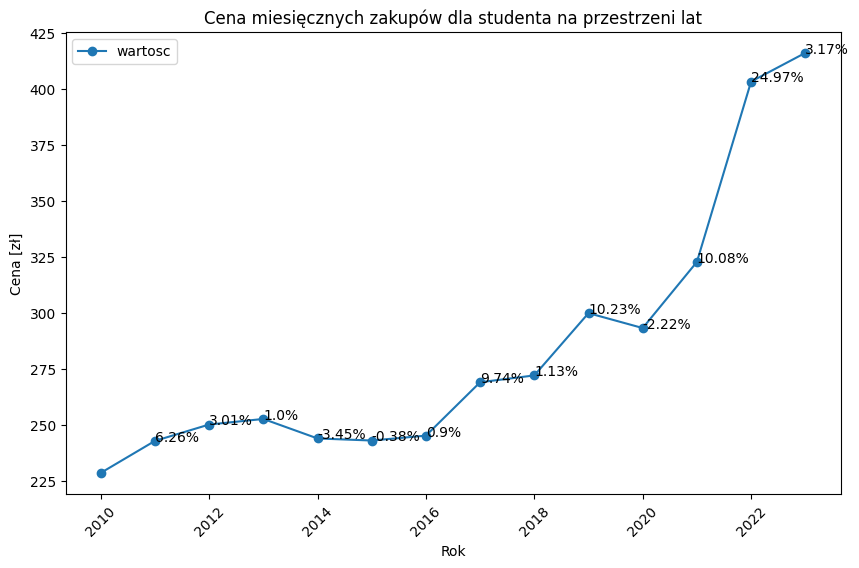

In [29]:

# calculate the sum of prices for the student for each year
students_mounthly_prices = {}
for key, value in students_mounthly_products.items():
    data_item = data[data['nazwa_pozycja_2'] == key]
    for i in range(len(data_item)):
        if data_item.iloc[i]['opis_okres'] in students_mounthly_prices:
            students_mounthly_prices[data_item.iloc[i]['opis_okres']] += data_item.iloc[i]['wartosc'] * value
        else:
            students_mounthly_prices[data_item.iloc[i]['opis_okres']] = data_item.iloc[i]['wartosc'] * value
            
students_mounthly_prices_df = pd.DataFrame(students_mounthly_prices.items(), columns=['rok', 'wartosc'])
students_mounthly_prices_df['rok'] = students_mounthly_prices_df['rok'].str[:4].astype(int)

# calculate the price change for the student use new data frame students_mounthly_prices_change
students_mounthly_prices_change = {}
for i in range(1, len(students_mounthly_prices_df)):
    students_mounthly_prices_change[students_mounthly_prices_df.iloc[i]['rok']] = (students_mounthly_prices_df.iloc[i]['wartosc'] - students_mounthly_prices_df.iloc[i-1]['wartosc'])/students_mounthly_prices_df.iloc[i-1]['wartosc']*100

students_mounthly_prices_change_df = pd.DataFrame(students_mounthly_prices_change.items(), columns=['rok', 'wartosc'])
# round to 2 decimal places
students_mounthly_prices_change_df['wartosc'] = students_mounthly_prices_change_df['wartosc'].round(2)


print(students_mounthly_prices_change_df)

print(students_mounthly_prices_df)

students_mounthly_prices_df.plot(x='rok', y='wartosc', kind='line', marker='o')

# plot students_mounthly_prices_change_df on the same plot
#show every year on the X axis
plt.xticks(students_mounthly_prices_df['rok'])
for i in range(len(students_mounthly_prices_change_df)):
    plt.text(students_mounthly_prices_change_df['rok'][i], students_mounthly_prices_df[students_mounthly_prices_df['rok'] == students_mounthly_prices_change_df['rok'][i]]['wartosc'], str(students_mounthly_prices_change_df['wartosc'][i]) + '%')
plt.xticks(rotation=45)
plt.xlabel('Rok')
plt.ylabel('Cena [zł]')
plt.title('Cena miesięcznych zakupów dla studenta na przestrzeni lat')
plt.show()

# UWAGA DO klasyfikacji marchwii jako owoc użyto definicji uni europejskiej z dyrektywy rady 2001/113/WE z dnia 20 grudnia 2001 roku „odnosząca się do dżemów owocowych, galaretek i marmolady oraz słodzonego purée z kasztanów przeznaczonych do spożycia przez ludzi, która ustanawia zasady wspólnego rynku unijnego dla produktów określanych jako dżemy”.
